
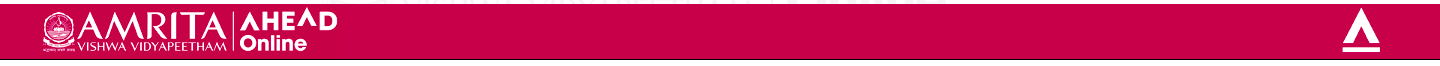

In [1]:
import pandas as pd
df = pd.read_csv('bbc_preprocessed.csv')
df.head()

,Unnamed: 0,category,text,category_id,clean_text
0,0,tech,tv future in the hands of viewers with home th...,4,tv future hands viewers home theatre systems p...
1,1,business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...
2,2,sport,tigers wary of farrell gamble leicester say ...,3,tigers wary farrell gamble leicester say rushe...
3,3,sport,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle fa cup premiership side...
4,4,entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean twelve raids box office ocean twelve cri...


#Vectorize

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['clean_text']

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(texts) #features
print(X.shape)

(2225, 27739)


In [3]:
X

<2225x27739 sparse matrix of type '<class 'numpy.float64'>'
	with 339390 stored elements in Compressed Sparse Row format>

#Cluster

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [4]:
from sklearn.cluster import AgglomerativeClustering
k = 5
model = AgglomerativeClustering(k)
model.fit(X.toarray())

AgglomerativeClustering(n_clusters=5)

In [5]:
labels=model.labels_
labels

array([4, 0, 2, ..., 1, 2, 2], dtype=int64)

#Compare with existing label column

In [6]:
data=pd.DataFrame(list(zip(df.category,labels)),columns=['labels','cluster'])
pd.set_option("display.max_rows", None)
data.sort_values('cluster')
data.sample(15)

,labels,cluster
1397,politics,0
652,tech,4
944,sport,2
1956,sport,1
1824,politics,3
200,sport,1
431,politics,3
95,sport,2
400,sport,2
2005,politics,0


In [7]:
data.head(25)

,labels,cluster
0,tech,4
1,business,0
2,sport,2
3,sport,2
4,entertainment,1
5,politics,3
6,politics,0
7,sport,2
8,sport,2
9,entertainment,1


#Printing the dendogram

code credits: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

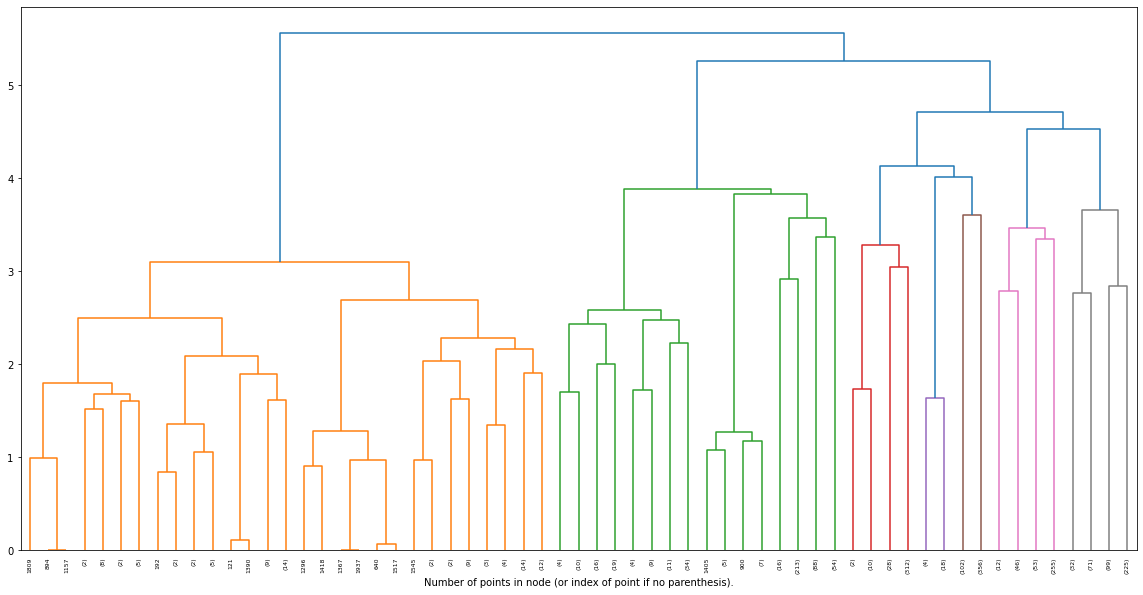

In [8]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X.toarray())
plot_dendrogram(model, truncate_mode='level', p=5)
plt.gcf().set_size_inches(20, 10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

Natural Language Processing - Lab Manual
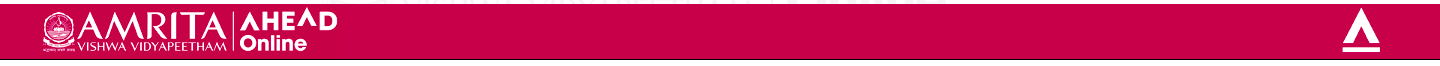